# Lab 06 notebook tutorial

<span style="color: red;">**Please do not read through this notebook until after the invention activity in class**</span>

Please see the bottom of this notebook for a summary of our new tool

In [1]:
import data_entry2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the prelab data we used for Lab 05
de = data_entry2.sheet("lab05_prelab_data1")

Sheet name: lab05_prelab_data1.csv


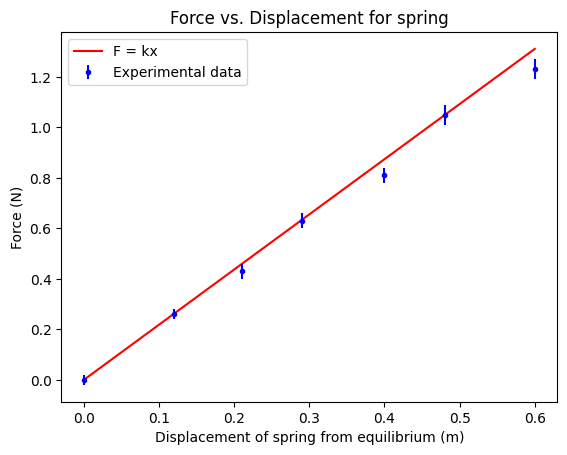

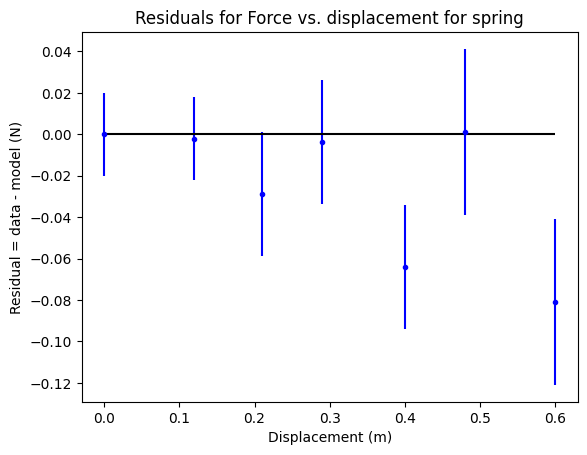

Slope:  2.185 N/m
Weighted chi-squared:  1.600723611111112


In [14]:
# Step 1: Find the limits of the data:
xmin = np.min(dxVec) # use the np.min function to find the smallest x value
xmax = np.max(dxVec) # same for max
# print (xmin, xmax)  # uncomment to see what the limits are

# Step 2: Generate a bunch of x points between xmin and xmax
xpoints = np.linspace(xmin, xmax, 200) # gives 200 evenly spaced points between xmin and xmax
# print(xpoints) # uncomment to see the x values that were generated.

# Step 3: Calculate the model values given your input to the slope:
slope = 2.185 # Your estimate of the slope.
P = 1 # Your number of fitting parameters, to be used in chi-squared calculation.
ypoints = slope * xpoints # this calculates the yvalues at all 200 points.

# Step 4: plot the curve. We plot this as a red line "r-" :
plt.plot(xpoints, ypoints, "r-", label = "F = kx")

# Let's plot our data with the model:
plt.errorbar(dxVec, FVec, u_FVec, fmt="bo", markersize = 3, label="Experimental data")
plt.title("Force vs. Displacement for spring")
plt.xlabel("Displacement of spring from equilibrium (m)")
plt.ylabel("Force (N)")
plt.legend()
plt.show()

#Residuals Plot
# Step 5: Calculate the model at each x-datapoint
ymodel = slope * dxVec # y = mx at each x_i

# Step 6: Calculate the residual vector
ResVec = FVec - ymodel

# Step 7: Plot the residual vector against the x-data vector
plt.errorbar(dxVec, ResVec, u_FVec, fmt="bo", markersize = 3)

# Step 8: Add a R = 0 x-axis (horizontal line) to the plot
plt.hlines(y=0, xmin=xmin, xmax=xmax, color='k') # draw axis at y = 0.

# Add axis labels and title, and show the graph
plt.title("Residuals for Force vs. displacement for spring")
plt.xlabel("Displacement (m)")
plt.ylabel("Residual = data - model (N)")
plt.show()

# Step 9: Calculate chi-squared 
chi2 = np.sum((ResVec/u_FVec)**2)/(len(ResVec)-P)
print ("Slope: ", slope, "N/m")
print ("Weighted chi-squared: ", chi2)


In [11]:
## Keep track of chi-squared based on changing the slope
dec = data_entry2.sheet('chi2-1.1')

Sheet name: chi2-1.1.csv


### Best estimate for slope:

* The best estimate of your slope will be the one you find above that has the lowest chi-squared.
* The best estimate of your uncertainties on the slope will be half of the difference between the slightly smaller slope `m_min` and slightly larger slope `m_max` that each increase the chi-squared by approximately +1.

In [15]:
# Best slope
m_best = 2.09 # Gives chi-squared of 0.57
m_max = 2.185 # Give chi-squared of 1.6 (approximately 1 higher than 0.57)
m_min = 2.0 # Gives chi-squared of 1.6 (approximately 1 higher than 0.57)
u_m = (m_max - m_min)/2.
print("Slope uncertainty:",u_m, "N/m")

Slope uncertainty: 0.09250000000000003 N/m


Best estimate of the slope is 2.090 $\pm$ 0.093 N/m.

# Appendix A: Fitting using reduced chi-squared minimization / weighted least squares fitting

$$\large \chi_w^2 = \frac{1}{N-P} \sum_{i=1}^N \left[ \frac{y_i - f(x_i) }{u\_y_i} \right]^2$$

When using chi-squared, the goal is to adjust your fitting parameters in order to minimize the value for chi-squared, which indicates the best possible fit of your model to the data.

Interpreting $\large \chi_w^2$:

* $\large \chi_w^2 \approx 1$: The model fits the data well, assuming uncertainties have been characterized well
* $\large \chi_w^2 \gg 1$: Not a good fit or the uncertainties have been underestimated
* $\large \chi_w^2 \ll 1$: The uncertainties have been overestimated

Using chi-squared is a 2-step process:
1. First minimize chi-squared by adjusting parameters.
2. Then, once it is minimized, interpret the value. 

The goal is **not** to make chi-squared = 1, it is to minimize it to find the best possible fit, and then interpret the resulting chi-squared value

# Appendix B: Including a y-intercept in your model

Here we provide an example of how to update everything to include a y-intercept (b) in your model. This requires the following changes, which are all indicated by `###` in the code below
1. In Step 4, add a yintercept, `b`;
2. In Step 4, update the number of fitting parameters `P` to be 2 since the fitting parameters are `slope` and `b`;
3. In Step 4, update the Step 3 model to include the y-intercept: `ypoints = slope * xpoints + b`;
4. In Step 5, update the model to include the y-intercept: `ymodel = slope * dxVec + b`;
5. In Step 9, the earlier update of `P` will make the `N-P` term be updated correctly so you don't need to update anything here: 
`chi2 = np.sum((ResVec/u_FVec)**2)/(len(ResVec)-P)`

**Note:** This is not actually a better in this case. The example is provided only to demonstrate the method

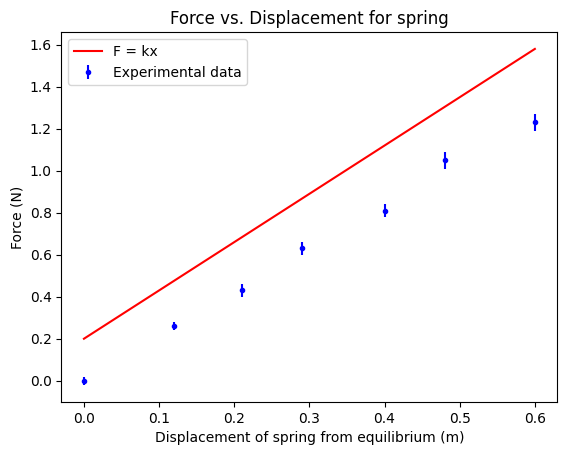

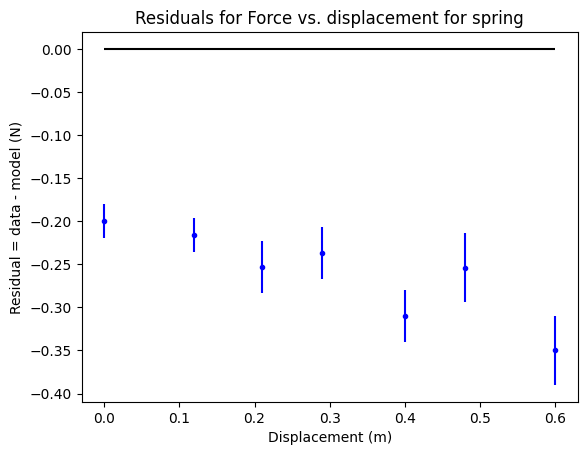

Slope:  2.3 N/m
Weighted chi-squared:  114.76677777777772


In [6]:
# Step 1: Find the limits of the data:
xmin = np.min(dxVec) 

# Step 2: Generate a bunch of x points between xmin and xmax
xpoints = np.linspace(xmin, xmax, 200) 

# Step 3: Calculate the model values given your input to the slope:
slope = 2.3 
b = 0.2 ### Added the y-intercept, b
P = 2 ### Updated number of fitting parameters to be 2 (m and b)
ypoints = slope * xpoints + b ### Update the model to include b

# Step 4: plot the curve. We plot this as a red line "r-" :
plt.plot(xpoints, ypoints, "r-", label = "F = kx")

# Let's plot our data with the model:
plt.errorbar(dxVec, FVec, u_FVec, fmt="bo", markersize = 3, label="Experimental data")
plt.title("Force vs. Displacement for spring")
plt.xlabel("Displacement of spring from equilibrium (m)")
plt.ylabel("Force (N)")
plt.legend()
plt.show()

#Residuals Plot
# Step 5: Calculate the model at each x-datapoint
ymodel = slope * dxVec + b ### Update the model to include b

# Step 6: Calculate the residual vector
ResVec = FVec - ymodel

# Step 7: Plot the residual vector against the x-data vector
plt.errorbar(dxVec, ResVec, u_FVec, fmt="bo", markersize = 3)

# Step 8: Add a R = 0 x-axis (horizontal line) to the plot
plt.hlines(y=0, xmin=xmin, xmax=xmax, color='k') 

# Add axis labels and title, and show the graph
plt.title("Residuals for Force vs. displacement for spring")
plt.xlabel("Displacement (m)")
plt.ylabel("Residual = data - model (N)")
plt.show()

# Step 9: Calculate chi-squared 
chi2 = np.sum((ResVec/u_FVec)**2)/(len(ResVec)-P) ### P was updated earlier
print ("Slope: ", slope, "N/m")
print ("Weighted chi-squared: ", chi2)
